In [8]:
import torch

import vcl
import dataset
import coresets
import plots
import numpy as np
from models import MultiheadModel

import numpy as np
import torch
import torchvision
from torchvision import transforms
import matplotlib.pyplot as plt
import random

import sys, os

In [2]:
# def _extract_class_specific_idx(dataset, target_classes):
#     """
#     dataset: torchvision.datasets.MNIST
#     target_classes: list
#     """
#     dataset.targets = torch.tensor(dataset.targets)
#     idx = torch.zeros_like(dataset.targets, dtype=torch.bool)
#     for target in target_classes:
#         idx = idx | (dataset.targets==target)
#     return idx

In [3]:
# def SplitCifar10Dataloader(class_distribution, batch_size=256):
#     """
#     class_distribution: list[list]
#     """
#     rsz = 32
#     transform = transforms.Compose([
#         transforms.Resize((rsz, rsz)),
#         transforms.ToTensor(),
#         transforms.Grayscale()
#     ])
#     root = "./data/cifar10"
#     dataset = torchvision.datasets.CIFAR10
#     trainset = dataset(root=root, train=True, download=True, transform=transform)
#     testset = dataset(root=root, train=False, download=True, transform=transform)

#     dataloaders = []

#     for classes in class_distribution:
#         train_idx = _extract_class_specific_idx(trainset, classes)
#         train_idx = torch.where(train_idx)[0]
#         sub_train_sampler = torch.utils.data.SubsetRandomSampler(train_idx)
#         sub_train_loader = torch.utils.data.DataLoader(
#             trainset, batch_size=batch_size, sampler=sub_train_sampler)
        

#         test_idx = _extract_class_specific_idx(testset, classes)
#         test_idx = torch.where(test_idx)[0]
#         sub_test_sampler = torch.utils.data.SubsetRandomSampler(test_idx)
#         sub_test_loader = torch.utils.data.DataLoader(
#             testset, batch_size=batch_size, sampler=sub_test_sampler)
        
#         dataloaders.append((sub_train_loader, sub_test_loader))

#     return dataloaders

In [4]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

num_tasks = 5
num_epochs = 10 # 100 or 10
single_head = False
batch_size = 256


Files already downloaded and verified
Files already downloaded and verified


c:\Users\Dell 5520\Downloads\9\dataset.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  dataset.targets = torch.tensor(dataset.targets)


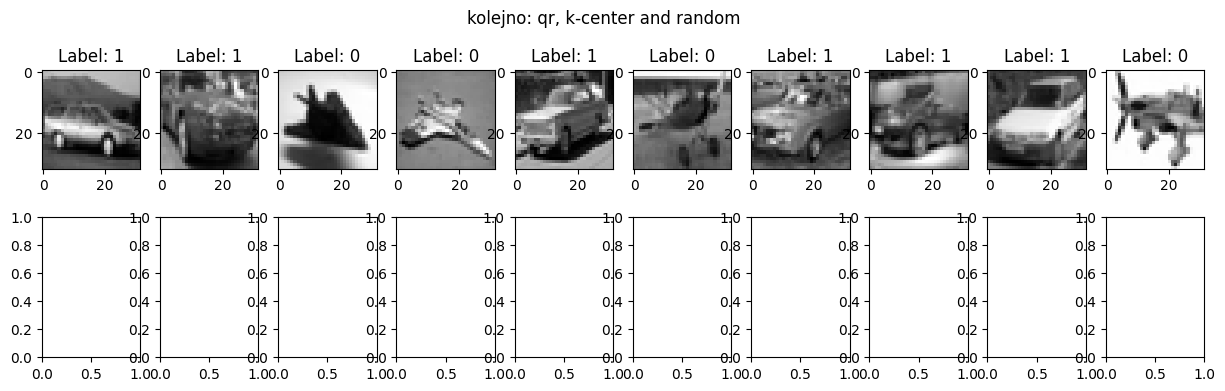

In [10]:
class_distribution = [
    [0, 1],
    [2, 3],
    [4, 5],
    [6, 7],
    [8, 9],
]
dataloaders = dataset.SplitCifar10Dataloader(class_distribution, batch_size)
trainloader, testloader = dataloaders[0]

# plot images
num_row = 2; num_col = 10; task = 0; c=trainloader.sampler.indices[range(10)]
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
fig.suptitle("kolejno: qr, k-center and random")

images = [trainloader.dataset[idx][0][0] for idx in c]
labels = [trainloader.dataset[idx][1] for idx in c]

for i in range(num_col):
    #ax = axes[i//num_col, i%num_col]
    ax = axes[0, i]
    ax.imshow(images[i], cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))

In [12]:
def run_vanilla_vcl(model, dataloaders, num_tasks, num_epochs, device, beta=0.01):
    model.reset_parameters()
    coreset_size = 0
    single_head = False
    coreset_method = coresets.attach_random_coreset_split
    all_accs = vcl.run_vcl(num_tasks, single_head, num_epochs, dataloaders,
                model, coreset_method, coreset_size, beta=beta)
    return all_accs

Files already downloaded and verified
Files already downloaded and verified
Starting Task 1


100%|██████████| 10/10 [01:24<00:00,  8.42s/it]


Done Training Task 1

Task 1 Accuracy: 0.7703575721153846

Starting Task 2


100%|██████████| 10/10 [01:22<00:00,  8.26s/it]


Done Training Task 2

Task 1 Accuracy: 0.7189378004807692
Task 2 Accuracy: 0.6431415264423077

Starting Task 3


100%|██████████| 10/10 [01:22<00:00,  8.30s/it]


Done Training Task 3

Task 1 Accuracy: 0.6134314903846154
Task 2 Accuracy: 0.6388596754807692
Task 3 Accuracy: 0.6331881009615384

Starting Task 4


100%|██████████| 10/10 [01:22<00:00,  8.23s/it]


Done Training Task 4

Task 1 Accuracy: 0.5999849759615384
Task 2 Accuracy: 0.6340144230769231
Task 3 Accuracy: 0.6123798076923077
Task 4 Accuracy: 0.6959134615384616

Starting Task 5


100%|██████████| 10/10 [01:22<00:00,  8.23s/it]


Done Training Task 5

Task 1 Accuracy: 0.5988957331730769
Task 2 Accuracy: 0.6053936298076923
Task 3 Accuracy: 0.5477013221153846
Task 4 Accuracy: 0.6560621995192308
Task 5 Accuracy: 0.7257361778846154

[[0.77035757        nan        nan        nan        nan]
 [0.7189378  0.64314153        nan        nan        nan]
 [0.61343149 0.63885968 0.6331881         nan        nan]
 [0.59998498 0.63401442 0.61237981 0.69591346        nan]
 [0.59889573 0.60539363 0.54770132 0.6560622  0.72573618]]
Files already downloaded and verified
Files already downloaded and verified
Starting Task 1


100%|██████████| 10/10 [01:25<00:00,  8.57s/it]


Done Training Task 1
Replaying Task 1


100%|██████████| 10/10 [00:01<00:00,  5.50it/s]



Task 1 Accuracy: 0.7423753004807692

Starting Task 2


100%|██████████| 10/10 [01:23<00:00,  8.31s/it]


Done Training Task 2
Replaying Task 1


100%|██████████| 10/10 [00:01<00:00,  5.53it/s]


Replaying Task 2


100%|██████████| 10/10 [00:01<00:00,  5.58it/s]



Task 1 Accuracy: 0.7312575120192308
Task 2 Accuracy: 0.6338266225961539

Starting Task 3


100%|██████████| 10/10 [01:22<00:00,  8.24s/it]


Done Training Task 3
Replaying Task 1


100%|██████████| 10/10 [00:01<00:00,  5.54it/s]


Replaying Task 2


100%|██████████| 10/10 [00:01<00:00,  5.55it/s]


Replaying Task 3


100%|██████████| 10/10 [00:01<00:00,  5.67it/s]



Task 1 Accuracy: 0.7356520432692308
Task 2 Accuracy: 0.6393103966346154
Task 3 Accuracy: 0.6242487980769231

Starting Task 4


100%|██████████| 10/10 [01:22<00:00,  8.28s/it]


Done Training Task 4
Replaying Task 1


100%|██████████| 10/10 [00:02<00:00,  4.61it/s]


Replaying Task 2


100%|██████████| 10/10 [00:01<00:00,  5.04it/s]


Replaying Task 3


100%|██████████| 10/10 [00:01<00:00,  5.54it/s]


Replaying Task 4


100%|██████████| 10/10 [00:01<00:00,  5.61it/s]



Task 1 Accuracy: 0.7032001201923077
Task 2 Accuracy: 0.6307466947115384
Task 3 Accuracy: 0.6336012620192308
Task 4 Accuracy: 0.6789738581730769

Starting Task 5


100%|██████████| 10/10 [01:26<00:00,  8.64s/it]


Done Training Task 5
Replaying Task 1


100%|██████████| 10/10 [00:01<00:00,  5.78it/s]


Replaying Task 2


100%|██████████| 10/10 [00:01<00:00,  5.30it/s]


Replaying Task 3


100%|██████████| 10/10 [00:01<00:00,  5.72it/s]


Replaying Task 4


100%|██████████| 10/10 [00:01<00:00,  5.60it/s]


Replaying Task 5


100%|██████████| 10/10 [00:01<00:00,  5.07it/s]



Task 1 Accuracy: 0.7607797475961539
Task 2 Accuracy: 0.6405498798076923
Task 3 Accuracy: 0.6459209735576923
Task 4 Accuracy: 0.6916316105769231
Task 5 Accuracy: 0.7450045072115384

[[0.7423753         nan        nan        nan        nan]
 [0.73125751 0.63382662        nan        nan        nan]
 [0.73565204 0.6393104  0.6242488         nan        nan]
 [0.70320012 0.63074669 0.63360126 0.67897386        nan]
 [0.76077975 0.64054988 0.64592097 0.69163161 0.74500451]]


<Figure size 640x480 with 0 Axes>

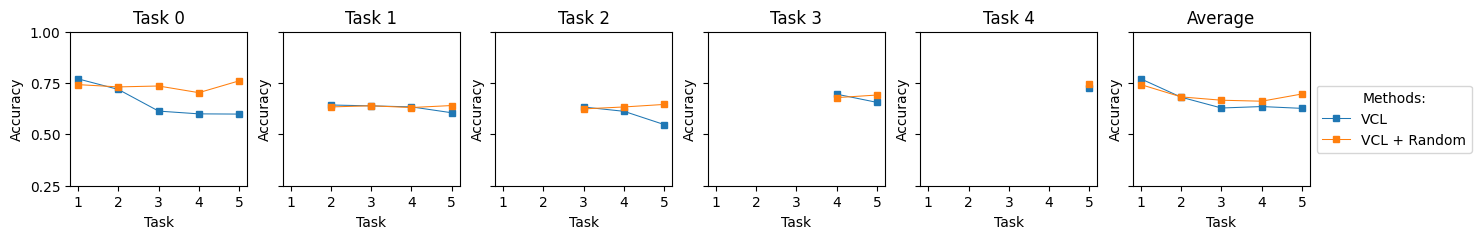

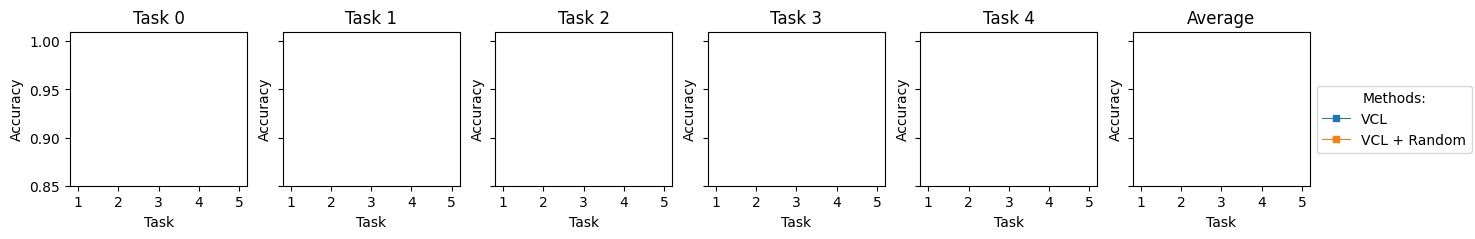

In [13]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

num_tasks = 5
num_epochs = 50 # 100 or 10
single_head = False
batch_size = 256

class_distribution = [
    [0, 1],
    [2, 3],
    [4, 5],
    [6, 7],
    [8, 9],
]

dataset_name="Cifar"
get_dataloader = lambda: dataset.SplitCifar10Dataloader(class_distribution, batch_size)
model = MultiheadModel(32*32); model.to(device)
data = []; methods = []

# # Vanilla VCL - no coreset
dataloaders = get_dataloader()
all_accs = run_vanilla_vcl(model, dataloaders, num_tasks, num_epochs, device)
data.append(all_accs); methods.append("VCL")


# Random Coreset VCL
coreset_size = 200
coreset_method = coresets.attach_random_coreset_split

model.reset_parameters(); dataloaders = get_dataloader()
all_accs = vcl.run_vcl(num_tasks, single_head, num_epochs, dataloaders,
            model, coreset_method, coreset_size, beta=0.01)
data.append(all_accs); methods.append("VCL + Random")


# K-Center Coreset VCL
coreset_size = 40
coreset_method = coresets.attach_kCenter_coreset_split

model.reset_parameters(); dataloaders = get_dataloader()
all_accs = vcl.run_vcl(num_tasks, single_head, num_epochs, dataloaders,
            model, coreset_method, coreset_size, beta=0.01)
data.append(all_accs); methods.append("VCL + K-Center")

# Random Coreset Only
coreset_size = 200
coreset_method = coresets.attach_random_coreset_split

model.reset_parameters(); dataloaders = get_dataloader()
all_accs = vcl.run_coresetonly(num_tasks, single_head, num_epochs, dataloaders,
            model, coreset_method, coreset_size, beta=0.01)
data.append(all_accs); methods.append("Random Coreset Only")

# K-center Coreset Only
coreset_size = 200
coreset_method = coresets.attach_kCenter_coreset_split

model.reset_parameters(); dataloaders = get_dataloader()
all_accs = vcl.run_coresetonly(num_tasks, single_head, num_epochs, dataloaders,
            model, coreset_method, coreset_size, beta=0.01)

data.append(all_accs); methods.append("K-Center Coreset Only")


plots.split_plot(data, methods)
np.save("./files/accuracy/2_accs_{fn}".format(fn=dataset_name), data)
np.save("./files/accuracy/2_meths_{fn}".format(fn=dataset_name), methods)

[[[0.99526066        nan        nan        nan        nan]
  [0.99526066 0.93137255        nan        nan        nan]
  [0.99526066 0.94117647 0.93582888        nan        nan]
  [0.99052133 0.92156863 0.93048128 0.96969697        nan]
  [0.99526066 0.93137255 0.9197861  0.97474747 0.92424242]]

 [[0.98578199        nan        nan        nan        nan]
  [0.98578199 0.93137255        nan        nan        nan]
  [0.98578199 0.90686275 0.95721925        nan        nan]
  [0.98578199 0.91176471 0.97326203 0.97979798        nan]
  [0.98104265 0.92647059 0.95187166 0.97979798 0.92424242]]

 [[0.99526066        nan        nan        nan        nan]
  [0.99526066 0.93137255        nan        nan        nan]
  [0.99526066 0.93627451 0.93582888        nan        nan]
  [0.99526066 0.91666667 0.94652406 0.97979798        nan]
  [0.99526066 0.95098039 0.93582888 0.97979798 0.92424242]]

 [[0.8957346         nan        nan        nan        nan]
  [0.96208531 0.57352941        nan        nan    

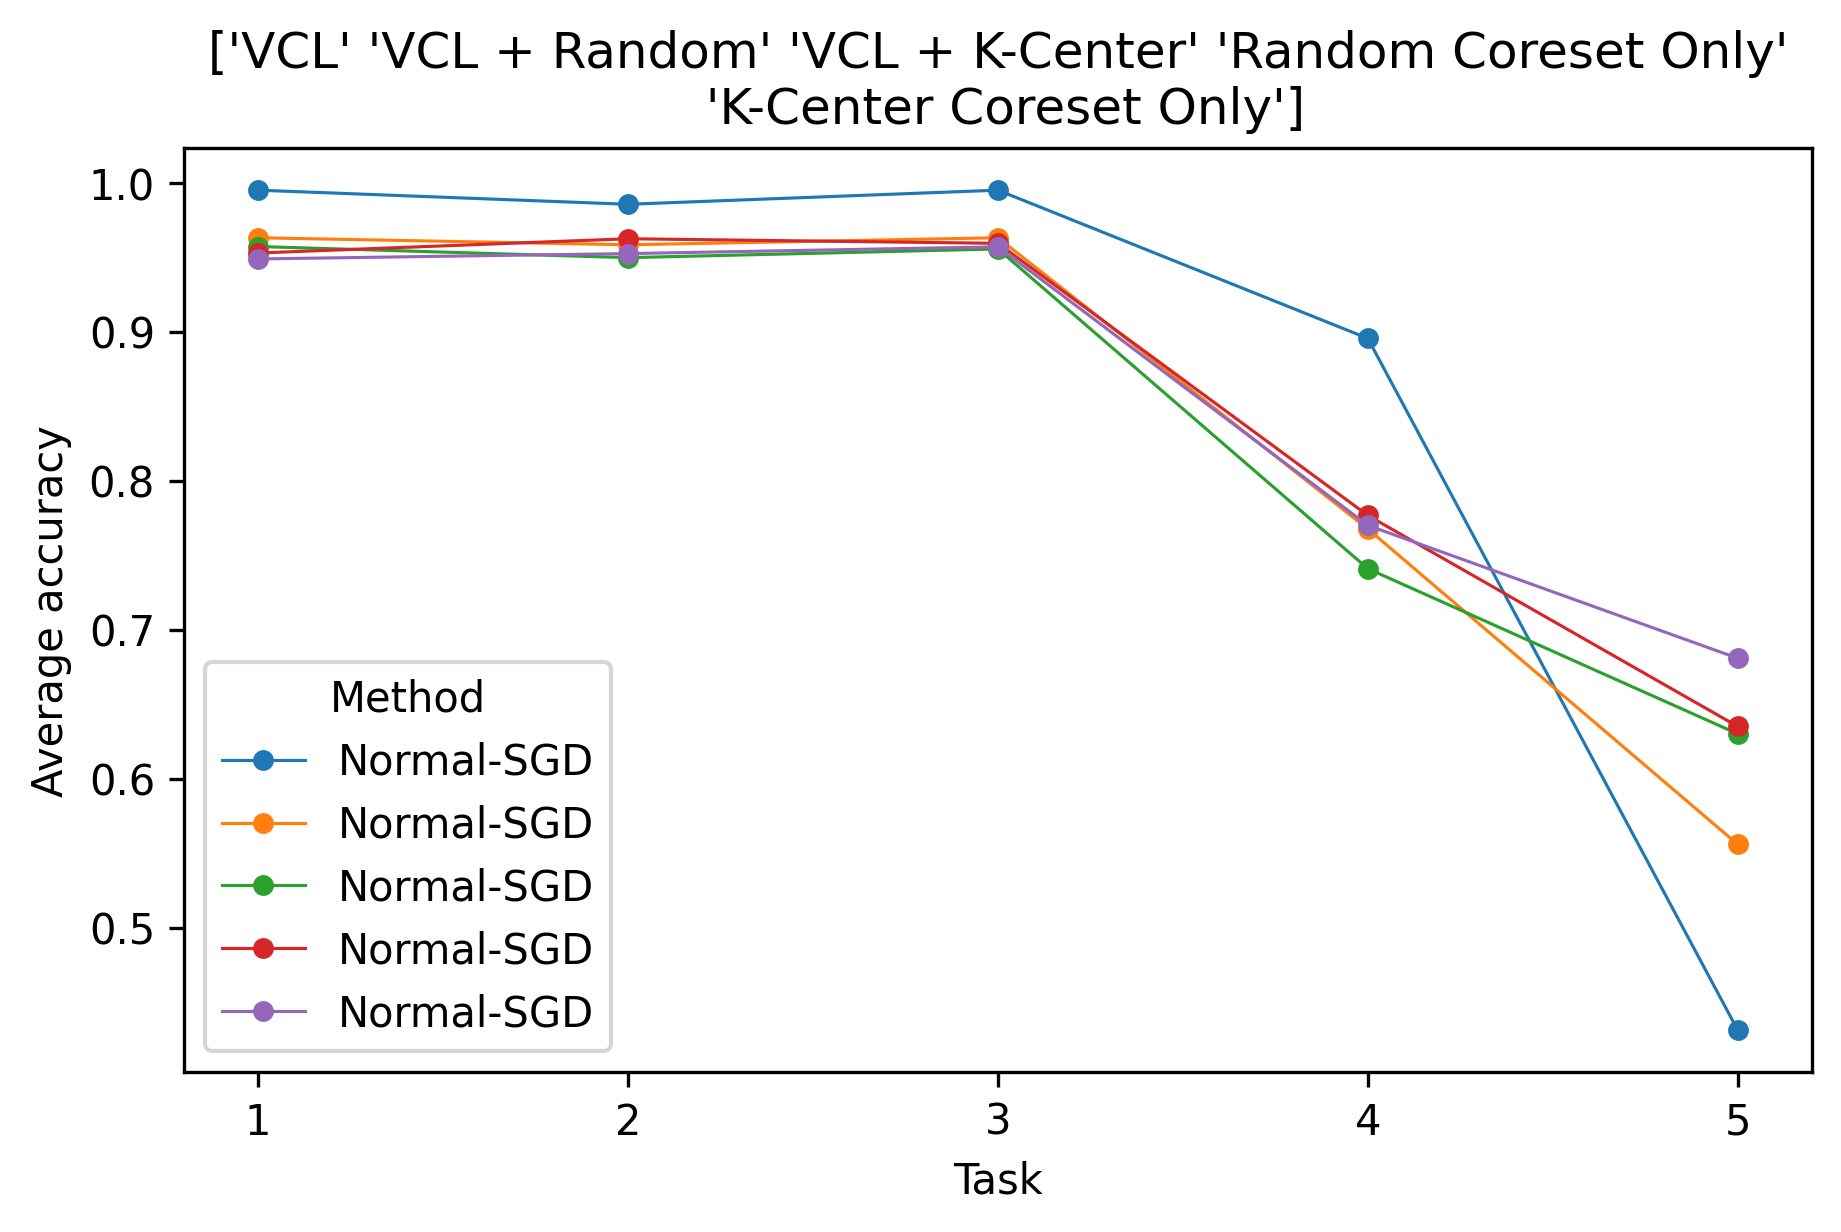

In [ ]:
D = np.load("files/accuracy/1_accs_{fn}.npy".format(fn=dataset_name))
M = np.load("files/accuracy/1_meths_{fn}.npy".format(fn=dataset_name))
print(D)
dd = []
for d in D:
    dd.append(np.nanmean(d,1))

plots.single_accuracy_plot(dd, M)

In [ ]:
plots.single_accuracy_plot(accs)

NameError: name 'accs' is not defined